In [3]:
import pandas as pd
import numpy as np

'''
df_p1 = pd.read_csv("in_data_cruda_p1_27072025.csv", 
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=';',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice
'''
df = pd.read_csv("dataset_entregas_bn_1000.csv")

In [4]:
# Resumen general
df.info()
print('df.columns:',df.columns)
print('df.shape:',df.shape)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Clima                       1000 non-null   object 
 1   TraficoPico                 1000 non-null   object 
 2   RiesgoRuta                  1000 non-null   object 
 3   Distancia_km                1000 non-null   float64
 4   TiempoEstimado_min          1000 non-null   float64
 5   TiempoReal_min              1000 non-null   float64
 6   Demora_min                  1000 non-null   float64
 7   TipoCarga                   1000 non-null   object 
 8   Peso_kg                     1000 non-null   int64  
 9   ExperienciaConductor_anios  1000 non-null   int64  
 10  AntiguedadCamion_anios      1000 non-null   int64  
 11  FallasMecanicas             1000 non-null   object 
 12  NivelCombustible_pct        1000 non-null   float64
 13  HorarioSalida               1000 n

,Clima,TraficoPico,RiesgoRuta,Distancia_km,TiempoEstimado_min,TiempoReal_min,Demora_min,TipoCarga,Peso_kg,ExperienciaConductor_anios,AntiguedadCamion_anios,FallasMecanicas,NivelCombustible_pct,HorarioSalida,EntregaATiempo
0,Lluvia,Bajo,Medio,291.94,291.9,327.5,35.6,Fragil,4013,5,6,No,65.6,Noche,No
1,Bueno,Medio,Medio,211.99,231.3,333.2,102.0,Normal,12517,9,2,Si,54.4,Manana,No
2,Lluvia,Bajo,Medio,93.25,101.7,147.2,45.4,Peligrosa,9804,6,6,No,58.6,Noche,No
3,Lluvia,Bajo,Medio,263.53,263.5,302.2,38.7,Fragil,9436,9,6,No,66.4,Tarde,No
4,Bueno,Medio,Bajo,38.72,42.2,69.2,27.0,Normal,9444,3,4,No,62.6,Tarde,Si
5,Tormenta,Medio,Bajo,273.30,328.0,404.1,76.2,Fragil,7362,6,8,No,58.6,Manana,No
6,Lluvia,Alto,Alto,210.50,315.8,392.9,77.1,Normal,10488,6,3,No,50.5,Manana,No
7,Lluvia,Medio,Medio,47.66,52.0,78.3,26.3,Normal,12606,6,8,No,99.4,Tarde,Si
8,Bueno,Medio,Medio,37.03,40.4,59.7,19.3,Normal,11542,5,6,No,62.5,Tarde,Si
9,Bueno,Medio,Bajo,265.28,318.3,352.4,34.0,Fragil,7748,7,5,No,74.9,Manana,No


In [5]:
#Resumen estadístico de todas las variables (describe()).
df.describe(include="all").T # incluye categóricas y numéricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Clima,1000,3,Bueno,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TraficoPico,1000,3,Medio,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RiesgoRuta,1000,3,Bajo,449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distancia_km,1000.0,NaN,NaN,NaN,177.72126,98.741609,7.85,93.65,178.415,263.2675,355.14
TiempoEstimado_min,1000.0,NaN,NaN,NaN,211.8653,126.74283,30.0,105.325,200.3,305.825,660.1
TiempoReal_min,1000.0,NaN,NaN,NaN,247.8248,135.686331,30.0,135.425,234.05,340.15,717.6
Demora_min,1000.0,NaN,NaN,NaN,35.9573,25.62529,0.0,17.85,31.45,47.225,161.5
TipoCarga,1000,3,Normal,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Peso_kg,1000.0,NaN,NaN,NaN,8646.956,2917.145984,500.0,6486.5,8441.5,10723.0,17891.0
ExperienciaConductor_anios,1000.0,NaN,NaN,NaN,6.016,2.394886,0.0,4.0,6.0,8.0,16.0


In [6]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
numeric_data = df.select_dtypes(include=[np.number])
categor_data = df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 8 numeric and 7 categorical columns in train data


In [7]:
numeric_data.describe().T
# Puedes ver la Distribución de variables numéricas (cantidad o freq, media, mediana, desviación estándar, mín, máx. etc.).

,count,mean,std,min,25%,50%,75%,max
Distancia_km,1000.0,177.72126,98.741609,7.85,93.650,178.415,263.2675,355.14
TiempoEstimado_min,1000.0,211.86530,126.742830,30.00,105.325,200.300,305.8250,660.10
TiempoReal_min,1000.0,247.82480,135.686331,30.00,135.425,234.050,340.1500,717.60
Demora_min,1000.0,35.95730,25.625290,0.00,17.850,31.450,47.2250,161.50
Peso_kg,1000.0,8646.95600,2917.145984,500.00,6486.500,8441.500,10723.0000,17891.00
ExperienciaConductor_anios,1000.0,6.01600,2.394886,0.00,4.000,6.000,8.0000,16.00
AntiguedadCamion_anios,1000.0,5.04600,2.210604,0.00,3.000,5.000,6.0000,15.00
NivelCombustible_pct,1000.0,69.54590,14.526444,25.70,59.800,69.400,79.7000,100.00


In [8]:
categor_data.describe(include="all").T
# Puedes ver valores únicos en categóricas 

,count,unique,top,freq
Clima,1000,3,Bueno,603
TraficoPico,1000,3,Medio,492
RiesgoRuta,1000,3,Bajo,449
TipoCarga,1000,3,Normal,621
FallasMecanicas,1000,2,No,952
HorarioSalida,1000,3,Manana,502
EntregaATiempo,1000,2,No,507


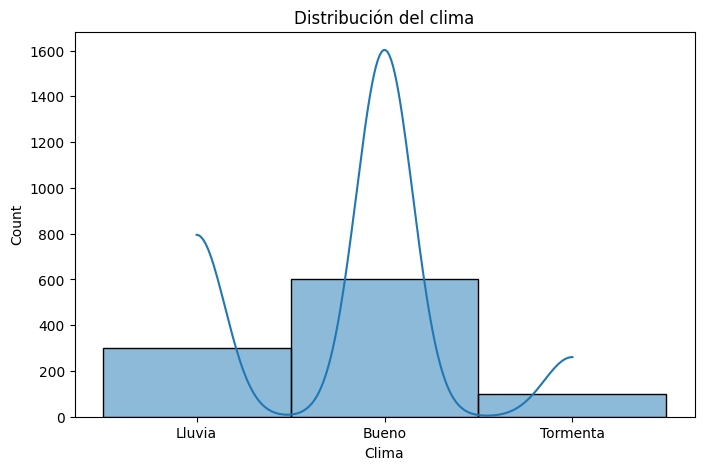

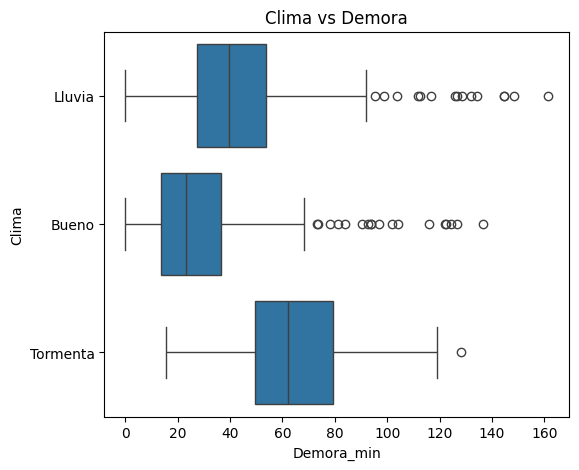

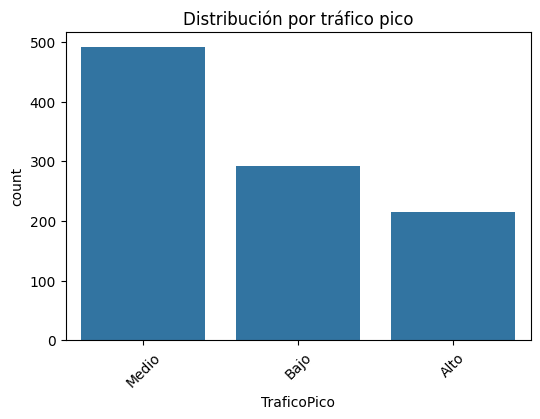

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de clima
plt.figure(figsize=(8,5))
sns.histplot(df['Clima'], bins=30, kde=True)
plt.title("Distribución del clima")
plt.show()

# Boxplot de clima por estado
plt.figure(figsize=(6,5))
sns.boxplot(x='Demora_min', y='Clima', data=df)
plt.title("Clima vs Demora")
plt.show()

# Conteo de tráfico pico
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='TraficoPico', order=df['TraficoPico'].value_counts().index)
plt.title("Distribución por tráfico pico")
plt.xticks(rotation=45)
plt.show()


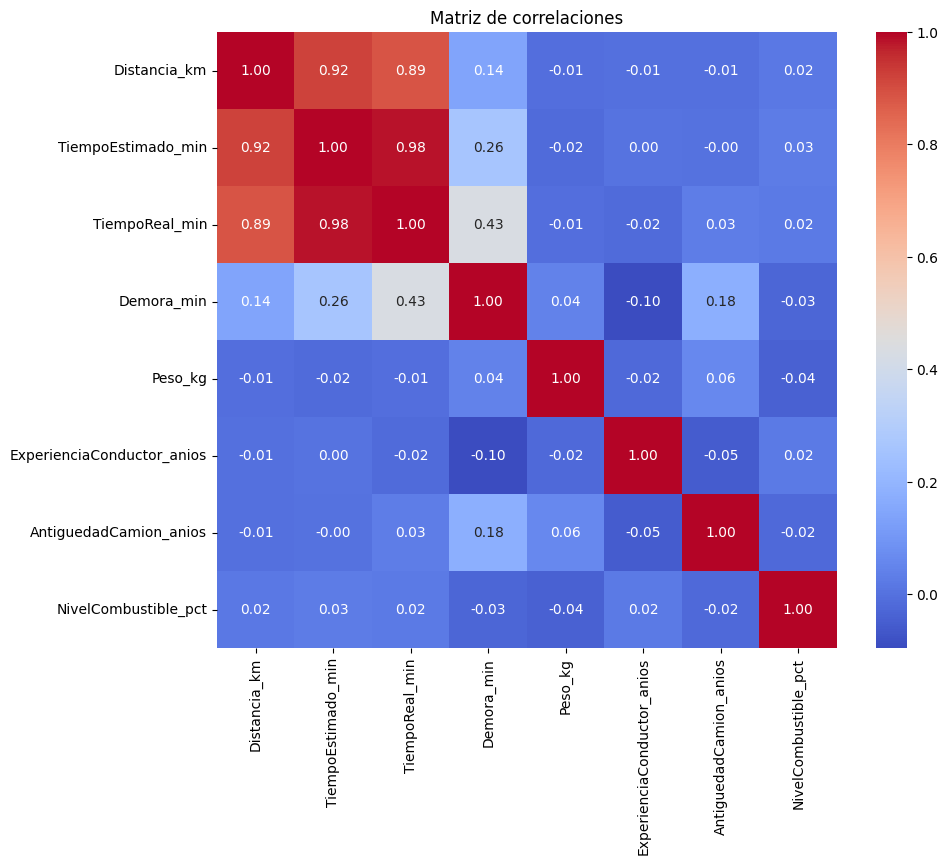

EntregaATiempo,No,Si
Clima,,
Bueno,35.820896,64.179104
Lluvia,67.892977,32.107023
Tormenta,89.795918,10.204082


In [11]:
# Correlaciones numéricas
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

# Cruce de variables categóricas con el objetivo
pd.crosstab(df['Clima'], df['EntregaATiempo'], normalize='index') * 100


In [12]:
# Conservar solo variables relevantes + objetivo
features_keep = ["Clima", "TraficoPico", "Distancia_km", "TiempoEstimado_min", 
                 "TiempoReal_min", "Demora_min", "TipoCarga", "Peso_kg", "ExperienciaConductor_anios", 
                 "AntiguedadCamion_anios", "FallasMecanicas", "NivelCombustible_pct", "HorarioSalida"]

target = ["EntregaATiempo"]

df_sel = df[features_keep+target]

print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
df_sel.head(3)

df_sel.shape: (1000, 14)
df_sel.columns: ['Clima', 'TraficoPico', 'Distancia_km', 'TiempoEstimado_min', 'TiempoReal_min', 'Demora_min', 'TipoCarga', 'Peso_kg', 'ExperienciaConductor_anios', 'AntiguedadCamion_anios', 'FallasMecanicas', 'NivelCombustible_pct', 'HorarioSalida', 'EntregaATiempo']


,Clima,TraficoPico,Distancia_km,TiempoEstimado_min,TiempoReal_min,Demora_min,TipoCarga,Peso_kg,ExperienciaConductor_anios,AntiguedadCamion_anios,FallasMecanicas,NivelCombustible_pct,HorarioSalida,EntregaATiempo
0,Lluvia,Bajo,291.94,291.9,327.5,35.6,Fragil,4013,5,6,No,65.6,Noche,No
1,Bueno,Medio,211.99,231.3,333.2,102.0,Normal,12517,9,2,Si,54.4,Manana,No
2,Lluvia,Bajo,93.25,101.7,147.2,45.4,Peligrosa,9804,6,6,No,58.6,Noche,No


In [13]:
df_sel

,Clima,TraficoPico,Distancia_km,TiempoEstimado_min,TiempoReal_min,Demora_min,TipoCarga,Peso_kg,ExperienciaConductor_anios,AntiguedadCamion_anios,FallasMecanicas,NivelCombustible_pct,HorarioSalida,EntregaATiempo
0,Lluvia,Bajo,291.94,291.9,327.5,35.6,Fragil,4013,5,6,No,65.6,Noche,No
1,Bueno,Medio,211.99,231.3,333.2,102.0,Normal,12517,9,2,Si,54.4,Manana,No
2,Lluvia,Bajo,93.25,101.7,147.2,45.4,Peligrosa,9804,6,6,No,58.6,Noche,No
3,Lluvia,Bajo,263.53,263.5,302.2,38.7,Fragil,9436,9,6,No,66.4,Tarde,No
4,Bueno,Medio,38.72,42.2,69.2,27.0,Normal,9444,3,4,No,62.6,Tarde,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bueno,Medio,14.80,30.0,42.5,12.5,Normal,11473,5,4,No,65.3,Noche,Si
996,Lluvia,Bajo,42.38,42.4,66.5,24.1,Fragil,2560,10,3,No,81.2,Tarde,Si
997,Bueno,Medio,164.09,179.0,206.0,27.0,Normal,7983,8,3,No,75.7,Manana,Si
998,Tormenta,Alto,122.55,245.1,314.5,69.4,Peligrosa,12663,11,6,No,75.3,Manana,Si


In [14]:
#separate variables into new data frames

numeric_data = df_sel.select_dtypes(include=[np.number])
categor_data = df_sel.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 8 numeric and 6 categorical columns in train data


In [15]:
numeric_data.describe()

,Distancia_km,TiempoEstimado_min,TiempoReal_min,Demora_min,Peso_kg,ExperienciaConductor_anios,AntiguedadCamion_anios,NivelCombustible_pct
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,177.721260,211.86530,247.824800,35.95730,8646.956000,6.016000,5.046000,69.545900
std,98.741609,126.74283,135.686331,25.62529,2917.145984,2.394886,2.210604,14.526444
min,7.850000,30.00000,30.000000,0.00000,500.000000,0.000000,0.000000,25.700000
25%,93.650000,105.32500,135.425000,17.85000,6486.500000,4.000000,3.000000,59.800000
50%,178.415000,200.30000,234.050000,31.45000,8441.500000,6.000000,5.000000,69.400000
75%,263.267500,305.82500,340.150000,47.22500,10723.000000,8.000000,6.000000,79.700000
max,355.140000,660.10000,717.600000,161.50000,17891.000000,16.000000,15.000000,100.000000


<Axes: >

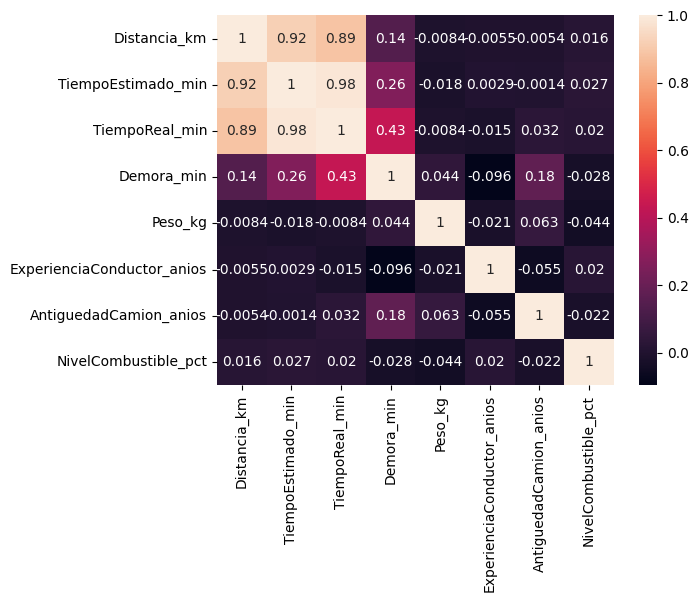

In [16]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, annot=True)

In [17]:
categor_data.describe()

,Clima,TraficoPico,TipoCarga,FallasMecanicas,HorarioSalida,EntregaATiempo
count,1000,1000,1000,1000,1000,1000
unique,3,3,3,2,3,2
top,Bueno,Medio,Normal,No,Manana,No
freq,603,492,621,952,502,507


In [18]:
print('numeric_data.columns:',numeric_data.columns)
print('categor_data.columns:',categor_data.columns)

numeric_data.columns: Index(['Distancia_km', 'TiempoEstimado_min', 'TiempoReal_min', 'Demora_min',
       'Peso_kg', 'ExperienciaConductor_anios', 'AntiguedadCamion_anios',
       'NivelCombustible_pct'],
      dtype='object')
categor_data.columns: Index(['Clima', 'TraficoPico', 'TipoCarga', 'FallasMecanicas', 'HorarioSalida',
       'EntregaATiempo'],
      dtype='object')


In [22]:
df=df_sel

In [23]:
# Mostrar tipos de datos originales
print("\n--- Tipos de datos originales ---")
print(df.dtypes)


--- Tipos de datos originales ---
Clima                          object
TraficoPico                    object
Distancia_km                  float64
TiempoEstimado_min            float64
TiempoReal_min                float64
Demora_min                    float64
TipoCarga                      object
Peso_kg                         int64
ExperienciaConductor_anios      int64
AntiguedadCamion_anios          int64
FallasMecanicas                object
NivelCombustible_pct          float64
HorarioSalida                  object
EntregaATiempo                 object
dtype: object


In [24]:
# Mostrar valores únicos de la variable objetivo
print("\n--- Valores únicos de EntregaATiempo ---")
print(df["EntregaATiempo"].unique())


--- Valores únicos de EntregaATiempo ---
['No' 'Si']


In [25]:
# Separar variable objetivo y convertir a numérico
# "Si" = 1 (entrega a tiempo), "No" = 0 (no entrega a tiempo)
y = df["EntregaATiempo"].map({"Si": 1, "No": 0}).values
print(f"\n✓ Variable objetivo convertida: {np.unique(y, return_counts=True)}")


✓ Variable objetivo convertida: (array([0, 1]), array([507, 493]))


In [27]:
# Eliminar la variable objetivo del dataframe
df_features = df.drop(columns=["EntregaATiempo"])


In [28]:
# ==================== CODIFICACIÓN DE VARIABLES CATEGÓRICAS ====================

print("\n--- Aplicando codificación de variables categóricas ---")

# Variables nominales (One-Hot Encoding)
nominales = ['Clima', 'TipoCarga', 'HorarioSalida']


--- Aplicando codificación de variables categóricas ---


In [29]:
# Variables ordinales (Label Encoding)
ordinales = ['TraficoPico', 'RiesgoRuta']


In [30]:
# Variables binarias (Label Encoding)
binarias = ['FallasMecanicas']

In [32]:
df

,Clima,TraficoPico,Distancia_km,TiempoEstimado_min,TiempoReal_min,Demora_min,TipoCarga,Peso_kg,ExperienciaConductor_anios,AntiguedadCamion_anios,FallasMecanicas,NivelCombustible_pct,HorarioSalida,EntregaATiempo
0,Lluvia,Bajo,291.94,291.9,327.5,35.6,Fragil,4013,5,6,No,65.6,Noche,No
1,Bueno,Medio,211.99,231.3,333.2,102.0,Normal,12517,9,2,Si,54.4,Manana,No
2,Lluvia,Bajo,93.25,101.7,147.2,45.4,Peligrosa,9804,6,6,No,58.6,Noche,No
3,Lluvia,Bajo,263.53,263.5,302.2,38.7,Fragil,9436,9,6,No,66.4,Tarde,No
4,Bueno,Medio,38.72,42.2,69.2,27.0,Normal,9444,3,4,No,62.6,Tarde,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bueno,Medio,14.80,30.0,42.5,12.5,Normal,11473,5,4,No,65.3,Noche,Si
996,Lluvia,Bajo,42.38,42.4,66.5,24.1,Fragil,2560,10,3,No,81.2,Tarde,Si
997,Bueno,Medio,164.09,179.0,206.0,27.0,Normal,7983,8,3,No,75.7,Manana,Si
998,Tormenta,Alto,122.55,245.1,314.5,69.4,Peligrosa,12663,11,6,No,75.3,Manana,Si


In [31]:
# Aplicar One-Hot Encoding a variables nominales
print("\n1. One-Hot Encoding para variables nominales:")
for col in nominales:
    if col in df_features.columns:
        unique_vals = df_features[col].unique()
        print(f"   {col}: {unique_vals}")
        
df_encoded = pd.get_dummies(df_features, columns=nominales, prefix=nominales, drop_first=False)



1. One-Hot Encoding para variables nominales:
   Clima: ['Lluvia' 'Bueno' 'Tormenta']
   TipoCarga: ['Fragil' 'Normal' 'Peligrosa']
   HorarioSalida: ['Noche' 'Manana' 'Tarde']


In [33]:
df

,Clima,TraficoPico,Distancia_km,TiempoEstimado_min,TiempoReal_min,Demora_min,TipoCarga,Peso_kg,ExperienciaConductor_anios,AntiguedadCamion_anios,FallasMecanicas,NivelCombustible_pct,HorarioSalida,EntregaATiempo
0,Lluvia,Bajo,291.94,291.9,327.5,35.6,Fragil,4013,5,6,No,65.6,Noche,No
1,Bueno,Medio,211.99,231.3,333.2,102.0,Normal,12517,9,2,Si,54.4,Manana,No
2,Lluvia,Bajo,93.25,101.7,147.2,45.4,Peligrosa,9804,6,6,No,58.6,Noche,No
3,Lluvia,Bajo,263.53,263.5,302.2,38.7,Fragil,9436,9,6,No,66.4,Tarde,No
4,Bueno,Medio,38.72,42.2,69.2,27.0,Normal,9444,3,4,No,62.6,Tarde,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bueno,Medio,14.80,30.0,42.5,12.5,Normal,11473,5,4,No,65.3,Noche,Si
996,Lluvia,Bajo,42.38,42.4,66.5,24.1,Fragil,2560,10,3,No,81.2,Tarde,Si
997,Bueno,Medio,164.09,179.0,206.0,27.0,Normal,7983,8,3,No,75.7,Manana,Si
998,Tormenta,Alto,122.55,245.1,314.5,69.4,Peligrosa,12663,11,6,No,75.3,Manana,Si


In [34]:
# Aplicar Label Encoding a variables ordinales
print("\n2. Label Encoding para variables ordinales:")
for col in ordinales:
    if col in df_encoded.columns:
        # Ordenar manualmente para mantener el orden: Bajo < Medio < Alto
        orden_map = {'Bajo': 0, 'Medio': 1, 'Alto': 2}
        df_encoded[col] = df_encoded[col].map(orden_map)
        print(f"   {col}: Bajo=0, Medio=1, Alto=2")



2. Label Encoding para variables ordinales:
   TraficoPico: Bajo=0, Medio=1, Alto=2


In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Aplicar Label Encoding a variables binarias
print("\n3. Label Encoding para variables binarias:")
for col in binarias:
    if col in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        clases = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"   {col}: {clases}")



3. Label Encoding para variables binarias:
   FallasMecanicas: {'No': np.int64(0), 'Si': np.int64(1)}


In [38]:
# Convertir a array numpy
X = df_encoded.values

In [39]:
print(f"\n✓ Dataset procesado: {X.shape[1]} features")
print(f"   - Features originales: {len(df_features.columns)}")
print(f"   - Features después de One-Hot: {X.shape[1]}")
print(f"\n--- Columnas finales ---")
for i, col in enumerate(df_encoded.columns):
    print(f"   {i+1}. {col}")


✓ Dataset procesado: 19 features
   - Features originales: 13
   - Features después de One-Hot: 19

--- Columnas finales ---
   1. TraficoPico
   2. Distancia_km
   3. TiempoEstimado_min
   4. TiempoReal_min
   5. Demora_min
   6. Peso_kg
   7. ExperienciaConductor_anios
   8. AntiguedadCamion_anios
   9. FallasMecanicas
   10. NivelCombustible_pct
   11. Clima_Bueno
   12. Clima_Lluvia
   13. Clima_Tormenta
   14. TipoCarga_Fragil
   15. TipoCarga_Normal
   16. TipoCarga_Peligrosa
   17. HorarioSalida_Manana
   18. HorarioSalida_Noche
   19. HorarioSalida_Tarde


In [41]:
X

array([[0, 291.94, 291.9, ..., False, True, False],
       [1, 211.99, 231.3, ..., True, False, False],
       [0, 93.25, 101.7, ..., False, True, False],
       ...,
       [1, 164.09, 179.0, ..., True, False, False],
       [2, 122.55, 245.1, ..., True, False, False],
       [1, 71.32, 77.8, ..., False, False, True]],
      shape=(1000, 19), dtype=object)

In [42]:
# ==================== 2) DIVISIÓN DEL DATASET (70/15/15) ====================
print("\n" + "="*70)
print("DIVISIÓN DEL DATASET")
print("="*70)


DIVISIÓN DEL DATASET


In [43]:
from sklearn.model_selection import train_test_split

X_tr, X_tmp, y_tr, y_tmp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_va, X_te, y_va, y_te = train_test_split(X_tmp, y_tmp, test_size=0.50, stratify=y_tmp, random_state=42)

print(f"\nTrain set: {X_tr.shape[0]} muestras ({X_tr.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_va.shape[0]} muestras ({X_va.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_te.shape[0]} muestras ({X_te.shape[0]/len(X)*100:.1f}%)")



Train set: 700 muestras (70.0%)
Validation set: 150 muestras (15.0%)
Test set: 150 muestras (15.0%)


In [44]:
# Distribución de clases
print(f"\n--- Distribución de clases ---")
print(f"Train - Clase 0: {np.sum(y_tr==0)} ({np.sum(y_tr==0)/len(y_tr)*100:.1f}%)")
print(f"Train - Clase 1: {np.sum(y_tr==1)} ({np.sum(y_tr==1)/len(y_tr)*100:.1f}%)")


--- Distribución de clases ---
Train - Clase 0: 355 (50.7%)
Train - Clase 1: 345 (49.3%)


In [45]:
# ==================== 3) ESCALADO DE CARACTERÍSTICAS ====================
print("\n" + "="*70)
print("ESCALADO DE CARACTERÍSTICAS (StandardScaler)")
print("="*70)


ESCALADO DE CARACTERÍSTICAS (StandardScaler)


In [47]:
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_va = sc.transform(X_va)
X_te = sc.transform(X_te)

print(f"\n✓ Media train: {X_tr.mean():.6f}")
print(f"✓ Desviación estándar train: {X_tr.std():.6f}")



✓ Media train: -0.000000
✓ Desviación estándar train: 1.000000


In [51]:
from sklearn.utils.class_weight import compute_class_weight

# ==================== 4) PESOS DE CLASE ====================
print("\n" + "="*70)
print("CÁLCULO DE PESOS DE CLASE")
print("="*70)

classes = np.unique(y_tr)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_tr)
class_weight = {int(c): float(w) for c, w in zip(classes, cw)}

print(f"\nPesos calculados:")
print(f"  Clase 0 (No entrega a tiempo): {class_weight[0]:.4f}")
print(f"  Clase 1 (Sí entrega a tiempo): {class_weight[1]:.4f}")



CÁLCULO DE PESOS DE CLASE

Pesos calculados:
  Clase 0 (No entrega a tiempo): 0.9859
  Clase 1 (Sí entrega a tiempo): 1.0145


In [53]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ==================== 5) CONSTRUCCIÓN DEL MODELO ====================
print("\n" + "="*70)
print("CONSTRUCCIÓN DEL MODELO MLP")
print("="*70)

n_feat = X_tr.shape[1]
print(f"\nNúmero de features de entrada: {n_feat}")

model = Sequential([
    Dense(64, activation="relu", kernel_regularizer=l2(1e-4), input_shape=(n_feat,)),
    Dropout(0.20),
    Dense(32, activation="relu", kernel_regularizer=l2(1e-4)),
    Dropout(0.20),
    Dense(16, activation="relu", kernel_regularizer=l2(1e-4)),
    Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["AUC","Precision","Recall"])

print("\n--- Arquitectura del modelo ---")
model.summary()

# Callbacks
es = EarlyStopping(monitor="val_auc", mode="max", patience=10, restore_best_weights=True, verbose=1)
rlr = ReduceLROnPlateau(monitor="val_auc", mode="max", factor=0.5, patience=5, min_lr=1e-5, verbose=1)



CONSTRUCCIÓN DEL MODELO MLP

Número de features de entrada: 19


c:\Users\alexi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Arquitectura del modelo ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# ==================== 6) ENTRENAMIENTO ====================
print("\n" + "="*70)
print("ENTRENAMIENTO DEL MODELO")
print("="*70)

history = model.fit(
    X_tr, y_tr,
    validation_data=(X_va, y_va),
    epochs=100,
    batch_size=64,
    callbacks=[es, rlr],
    class_weight=class_weight,
    verbose=1
)



ENTRENAMIENTO DEL MODELO
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - AUC: 0.6034 - Precision: 0.5385 - Recall: 0.0609 - loss: 0.7112 - val_AUC: 0.8192 - val_Precision: 0.9333 - val_Recall: 0.1892 - val_loss: 0.6424 - learning_rate: 0.0010
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.7496 - Precision: 0.7218 - Recall: 0.2783 - loss: 0.6455 - val_AUC: 0.9138 - val_Precision: 0.9444 - val_Recall: 0.6892 - val_loss: 0.5800 - learning_rate: 0.0010
Epoch 3/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.8407 - Precision: 0.8235 - Recall: 0.4667 - loss: 0.6090

c:\Users\alexi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,Precision,Recall,loss,val_AUC,val_Precision,val_Recall,val_loss
  current = self.get_monitor_value(logs)
c:\Users\alexi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\callbacks\callback_list.py:171: UserWarning: Learning rate reduction is conditioned on metric `val_auc` which is not available. Available metrics are: AUC,Precision,Recall,loss,val_AUC,val_Precision,val_Recall,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8174 - Precision: 0.8008 - Recall: 0.5478 - loss: 0.5995 - val_AUC: 0.9287 - val_Precision: 0.8806 - val_Recall: 0.7973 - val_loss: 0.5288 - learning_rate: 0.0010
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.8561 - Precision: 0.7938 - Recall: 0.7478 - loss: 0.5550 - val_AUC: 0.9317 - val_Precision: 0.8732 - val_Recall: 0.8378 - val_loss: 0.4797 - learning_rate: 0.0010
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8723 - Precision: 0.7989 - Recall: 0.8174 - loss: 0.5198 - val_AUC: 0.9395 - val_Precision: 0.8553 - val_Recall: 0.8784 - val_loss: 0.4314 - learning_rate: 0.0010
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8915 - Precision: 0.8156 - Recall: 0.8464 - loss: 0.4656 - val_AUC: 0.9418 - val_Precision: 0.8442 - val_Recall: 0.8784 - val_loss: 0.3941 - learning_rate: 0.0010
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8903 - Precision: 0.7892 - Recall: 0.8899 - loss: 0.4621 - 

In [57]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, classification_report, confusion_matrix


# 6) Evaluación
p_va = model.predict(X_va).ravel()
p_te = model.predict(X_te).ravel()

print("Val ROC-AUC:", roc_auc_score(y_va, p_va))
print("Val PR-AUC:", average_precision_score(y_va, p_va))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Val ROC-AUC: 0.9822190611664297
Val PR-AUC: 0.9873652443821918


In [58]:
# Umbral óptimo por F1 en validación
ths = np.linspace(0.1, 0.9, 81)
best_th, best_f1 = 0.5, 0
for th in ths:
    f1 = f1_score(y_va, (p_va>=th).astype(int))
    if f1 > best_f1:
        best_f1, best_th = f1, th

print("Best threshold (val):", best_th, "F1:", best_f1)

Best threshold (val): 0.74 F1: 0.9655172413793104


In [59]:
# Reporte en test con ese umbral
yhat_te = (p_te >= best_th).astype(int)
print(classification_report(y_te, yhat_te, digits=3))


              precision    recall  f1-score   support

           0      0.854     0.921     0.886        76
           1      0.912     0.838     0.873        74

    accuracy                          0.880       150
   macro avg      0.883     0.879     0.880       150
weighted avg      0.882     0.880     0.880       150




=== MATRIZ DE CONFUSIÓN ===

Validación:
[[75  1]
 [ 4 70]]

Test:
[[70  6]
 [12 62]]

Matriz de confusión guardada como 'mlp_confusion_matrix.png'


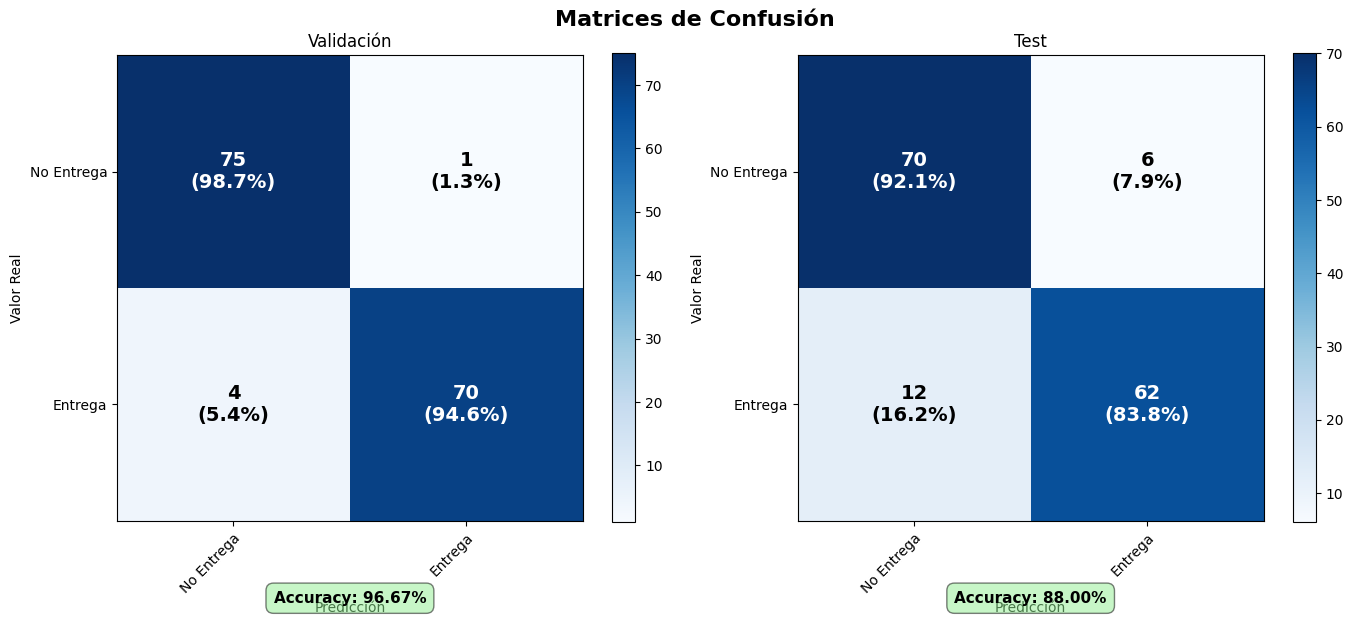


=== MÉTRICAS DETALLADAS (TEST SET) ===

Valores de la matriz:
  True Negatives (TN):    70 - Correctamente predicho como NO entrega
  False Positives (FP):    6 - Incorrectamente predicho como SÍ entrega
  False Negatives (FN):   12 - Incorrectamente predicho como NO entrega
  True Positives (TP):    62 - Correctamente predicho como SÍ entrega

Métricas calculadas:
  Accuracy:    0.8800 (88.00%)
  Precision:   0.9118 (91.18%)
  Recall:      0.8378 (83.78%)
  Specificity: 0.9211 (92.11%)
  F1-Score:    0.8732
  Error Rate:  0.1200 (12.00%)


In [64]:
# Matriz de confusión
print("\n=== MATRIZ DE CONFUSIÓN ===")

# Calcular matrices de confusión para validación y test
cm_val = confusion_matrix(y_va, (p_va >= best_th).astype(int))
cm_test = confusion_matrix(y_te, yhat_te)

print("\nValidación:")
print(cm_val)
print("\nTest:")
print(cm_test)

# Visualización de las matrices de confusión
fig_cm, axes_cm = plt.subplots(1, 2, figsize=(14, 6))
fig_cm.suptitle('Matrices de Confusión', fontsize=16, fontweight='bold')

# Función para crear matriz de confusión visualmente atractiva
def plot_confusion_matrix(cm, ax, title, labels=['No Entrega', 'Entrega']):
    """Dibuja una matriz de confusión con anotaciones y porcentajes"""
    # Calcular porcentajes
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Crear el heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)
    
    # Configurar ticks y etiquetas
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels,
           yticklabels=labels,
           title=title,
           ylabel='Valor Real',
           xlabel='Predicción')
    
    # Rotar las etiquetas del eje x
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Agregar anotaciones con valores y porcentajes
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            count = cm[i, j]
            percent = cm_percent[i, j]
            text = f'{count}\n({percent:.1f}%)'
            ax.text(j, i, text,
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black",
                   fontsize=14, fontweight='bold')
    
    # Agregar información adicional
    total = cm.sum()
    accuracy = (cm[0, 0] + cm[1, 1]) / total * 100
    ax.text(0.5, -0.15, f'Accuracy: {accuracy:.2f}%', 
            ha='center', va='top', transform=ax.transAxes, 
            fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.5))

# Graficar matriz de confusión para validación
plot_confusion_matrix(cm_val, axes_cm[0], 'Validación')

# Graficar matriz de confusión para test
plot_confusion_matrix(cm_test, axes_cm[1], 'Test')

plt.tight_layout()
print("\nMatriz de confusión guardada como 'mlp_confusion_matrix.png'")
plt.show()

# Calcular y mostrar métricas detalladas de la matriz de confusión
print("\n=== MÉTRICAS DETALLADAS (TEST SET) ===")
tn, fp, fn, tp = cm_test.ravel()

print(f"\nValores de la matriz:")
print(f"  True Negatives (TN):  {tn:4d} - Correctamente predicho como NO entrega")
print(f"  False Positives (FP): {fp:4d} - Incorrectamente predicho como SÍ entrega")
print(f"  False Negatives (FN): {fn:4d} - Incorrectamente predicho como NO entrega")
print(f"  True Positives (TP):  {tp:4d} - Correctamente predicho como SÍ entrega")

print(f"\nMétricas calculadas:")
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"  Accuracy:    {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision:   {precision:.4f} ({precision*100:.2f}%)")
print(f"  Recall:      {recall:.4f} ({recall*100:.2f}%)")
print(f"  Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"  F1-Score:    {f1:.4f}")

# Tasa de error
error_rate = (fp + fn) / (tp + tn + fp + fn)
print(f"  Error Rate:  {error_rate:.4f} ({error_rate*100:.2f}%)")


In [65]:
# 7) Visualización del aprendizaje por época
print("\n=== HISTORIAL DE ENTRENAMIENTO ===")
print(f"Épocas entrenadas: {len(history.history['loss'])}")
print(f"Métricas disponibles: {list(history.history.keys())}")



=== HISTORIAL DE ENTRENAMIENTO ===
Épocas entrenadas: 100
Métricas disponibles: ['AUC', 'Precision', 'Recall', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_loss', 'learning_rate']


Mapeo de métricas: {}

Gráfica guardada como 'mlp_training_history.png'


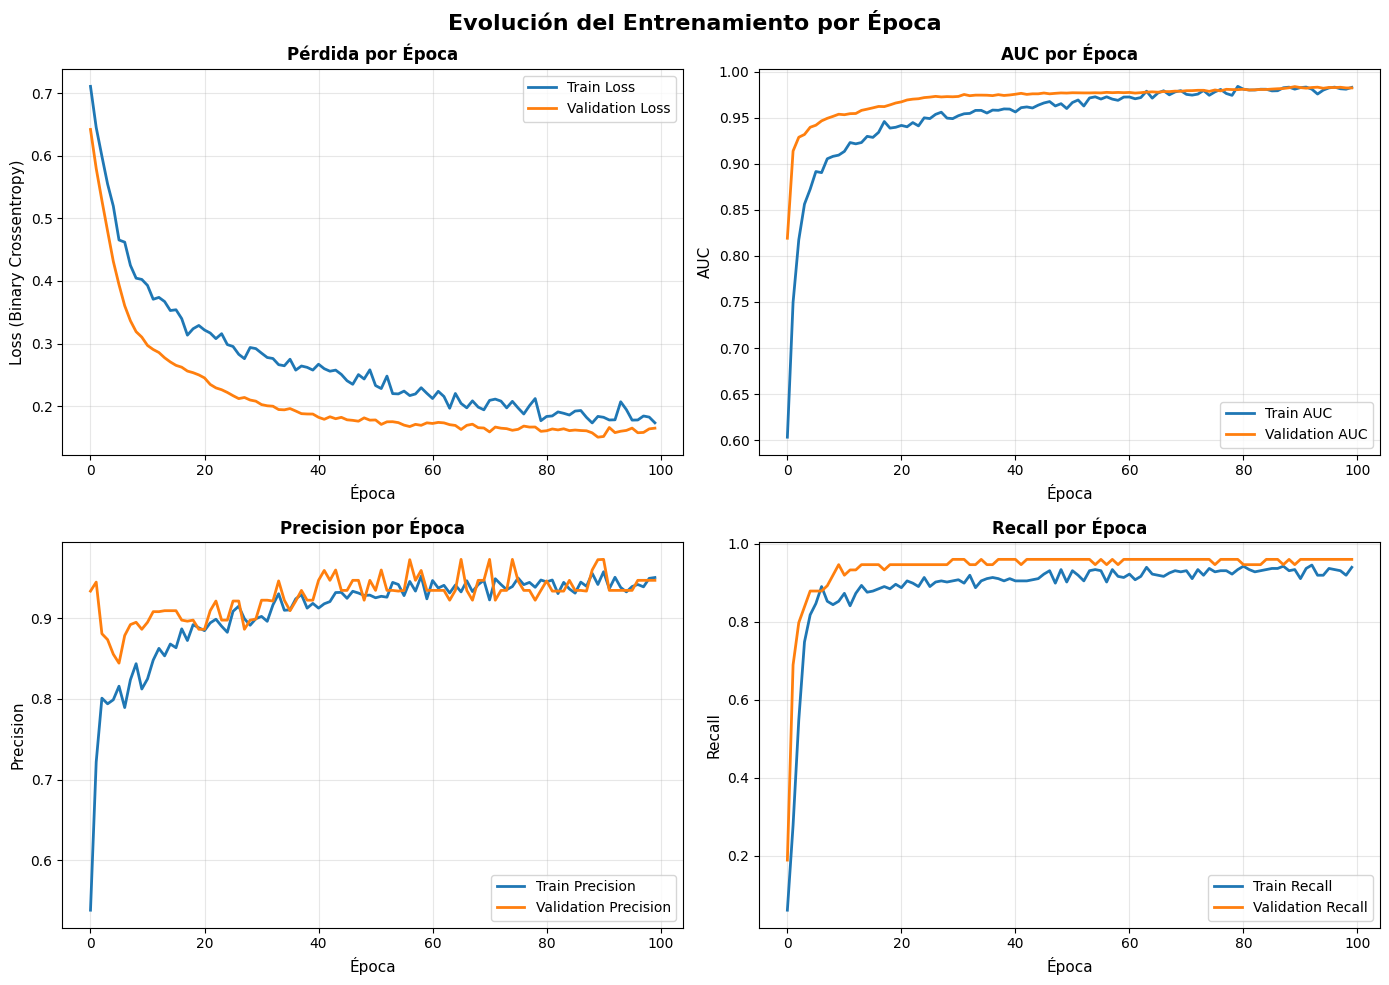


=== MÉTRICAS FINALES ===

Época final: 99
Train Loss: 0.1732
Val Loss: 0.1646
Train AUC: 0.9828
Val AUC: 0.9822
Train PRECISION: 0.9501
Val PRECISION: 0.9467
Train RECALL: 0.9391
Val RECALL: 0.9595
Train LEARNING_RATE: 0.0010


In [ ]:
# Obtener los nombres reales de las métricas
metric_keys = list(history.history.keys())
# Filtrar para obtener solo las métricas de entrenamiento (sin 'val_')
train_metrics = [k for k in metric_keys if not k.startswith('val_') and k != 'loss']

# Crear un diccionario que mapee métricas de entrenamiento a validación
val_metrics_map = {}
for train_metric in train_metrics:
    # Buscar la métrica de validación correspondiente
    for val_key in metric_keys:
        if val_key.startswith('val_') and train_metric in val_key.lower():
            val_metrics_map[train_metric] = val_key
            break

print(f"Mapeo de métricas: {val_metrics_map}")

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Evolución del Entrenamiento por Época', fontsize=16, fontweight='bold')

# Subplot 1: Loss (Error)
axes[0, 0].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_xlabel('Época', fontsize=11)
axes[0, 0].set_ylabel('Loss (Binary Crossentropy)', fontsize=11)
axes[0, 0].set_title('Pérdida por Época', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Primera métrica (AUC)
if len(train_metrics) > 0:
    metric_name = train_metrics[0]
    val_metric_name = val_metrics_map.get(metric_name, f'val_{metric_name}')
    axes[0, 1].plot(history.history[metric_name], label=f'Train {metric_name.upper()}', linewidth=2)
    if val_metric_name in history.history:
        axes[0, 1].plot(history.history[val_metric_name], label=f'Validation {metric_name.upper()}', linewidth=2)
    axes[0, 1].set_xlabel('Época', fontsize=11)
    axes[0, 1].set_ylabel(metric_name.upper(), fontsize=11)
    axes[0, 1].set_title(f'{metric_name.upper()} por Época', fontsize=12, fontweight='bold')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# Subplot 3: Segunda métrica (Precision)
if len(train_metrics) > 1:
    metric_name = train_metrics[1]
    val_metric_name = val_metrics_map.get(metric_name, f'val_{metric_name}')
    axes[1, 0].plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}', linewidth=2)
    if val_metric_name in history.history:
        axes[1, 0].plot(history.history[val_metric_name], label=f'Validation {metric_name.capitalize()}', linewidth=2)
    axes[1, 0].set_xlabel('Época', fontsize=11)
    axes[1, 0].set_ylabel(metric_name.capitalize(), fontsize=11)
    axes[1, 0].set_title(f'{metric_name.capitalize()} por Época', fontsize=12, fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# Subplot 4: Tercera métrica (Recall)
if len(train_metrics) > 2:
    metric_name = train_metrics[2]
    val_metric_name = val_metrics_map.get(metric_name, f'val_{metric_name}')
    axes[1, 1].plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}', linewidth=2)
    if val_metric_name in history.history:
        axes[1, 1].plot(history.history[val_metric_name], label=f'Validation {metric_name.capitalize()}', linewidth=2)
    axes[1, 1].set_xlabel('Época', fontsize=11)
    axes[1, 1].set_ylabel(metric_name.capitalize(), fontsize=11)
    axes[1, 1].set_title(f'{metric_name.capitalize()} por Época', fontsize=12, fontweight='bold')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
print("\nGráfica guardada como 'mlp_training_history.png'")
plt.show()

# Mostrar métricas finales
print("\n=== MÉTRICAS FINALES ===")
final_epoch = len(history.history['loss']) - 1
print(f"\nÉpoca final: {final_epoch}")
print(f"Train Loss: {history.history['loss'][-1]:.4f}")
print(f"Val Loss: {history.history['val_loss'][-1]:.4f}")

# Imprimir todas las métricas disponibles
for metric in train_metrics:
    val_metric = val_metrics_map.get(metric, f'val_{metric}')
    print(f"Train {metric.upper()}: {history.history[metric][-1]:.4f}")
    if val_metric in history.history:
        print(f"Val {metric.upper()}: {history.history[val_metric][-1]:.4f}")

In [67]:
# 8) Información sobre los pesos del modelo
print("\n=== INFORMACIÓN DE PESOS DEL MODELO ===")
print(f"\nTotal de capas: {len(model.layers)}")
print(f"Capas entrenables: {sum([1 for layer in model.layers if layer.trainable])}")

total_params = 0
trainable_params = 0

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if len(weights) > 0:
        print(f"\n--- Capa {i+1}: {layer.name} ({layer.__class__.__name__}) ---")
        print(f"  Activación: {layer.activation.__name__ if hasattr(layer, 'activation') else 'N/A'}")
        
        # Obtener formas de entrada y salida de manera segura
        try:
            input_shape = layer.input.shape if hasattr(layer, 'input') else 'N/A'
            output_shape = layer.output.shape if hasattr(layer, 'output') else 'N/A'
            print(f"  Forma de entrada: {input_shape}")
            print(f"  Forma de salida: {output_shape}")
        except:
            pass
        
        # Pesos (W) y sesgos (b)
        if len(weights) >= 2:
            W, b = weights[0], weights[1]
            print(f"  Matriz de pesos (W): {W.shape}")
            print(f"    - Rango: [{W.min():.4f}, {W.max():.4f}]")
            print(f"    - Media: {W.mean():.4f}")
            print(f"    - Desviación estándar: {W.std():.4f}")
            print(f"  Vector de sesgos (b): {b.shape}")
            print(f"    - Rango: [{b.min():.4f}, {b.max():.4f}]")
            print(f"    - Media: {b.mean():.4f}")
            
            # Contar parámetros
            layer_params = W.size + b.size
            total_params += layer_params
            if layer.trainable:
                trainable_params += layer_params
            print(f"  Parámetros en esta capa: {layer_params:,}")
    else:
        print(f"\n--- Capa {i+1}: {layer.name} ({layer.__class__.__name__}) ---")
        print(f"  Sin pesos (capa de regularización)")

print(f"\n{'='*50}")
print(f"TOTAL DE PARÁMETROS: {total_params:,}")
print(f"Parámetros entrenables: {trainable_params:,}")
print(f"Parámetros no entrenables: {(total_params - trainable_params):,}")


=== INFORMACIÓN DE PESOS DEL MODELO ===

Total de capas: 6
Capas entrenables: 6

--- Capa 1: dense (Dense) ---
  Activación: relu
  Forma de entrada: (None, 19)
  Forma de salida: (None, 64)
  Matriz de pesos (W): (19, 64)
    - Rango: [-0.8042, 0.5130]
    - Media: 0.0022
    - Desviación estándar: 0.1660
  Vector de sesgos (b): (64,)
    - Rango: [-0.1891, 0.1169]
    - Media: -0.0354
  Parámetros en esta capa: 1,280

--- Capa 2: dropout (Dropout) ---
  Sin pesos (capa de regularización)

--- Capa 3: dense_1 (Dense) ---
  Activación: relu
  Forma de entrada: (None, 64)
  Forma de salida: (None, 32)
  Matriz de pesos (W): (64, 32)
    - Rango: [-0.4672, 0.3876]
    - Media: 0.0012
    - Desviación estándar: 0.1550
  Vector de sesgos (b): (32,)
    - Rango: [-0.0521, 0.1396]
    - Media: 0.0197
  Parámetros en esta capa: 2,080

--- Capa 4: dropout_1 (Dropout) ---
  Sin pesos (capa de regularización)

--- Capa 5: dense_2 (Dense) ---
  Activación: relu
  Forma de entrada: (None, 32)
  F


=== VISUALIZACIÓN DE DISTRIBUCIÓN DE PESOS ===
Gráfica de distribución de pesos guardada como 'mlp_weights_distribution.png'


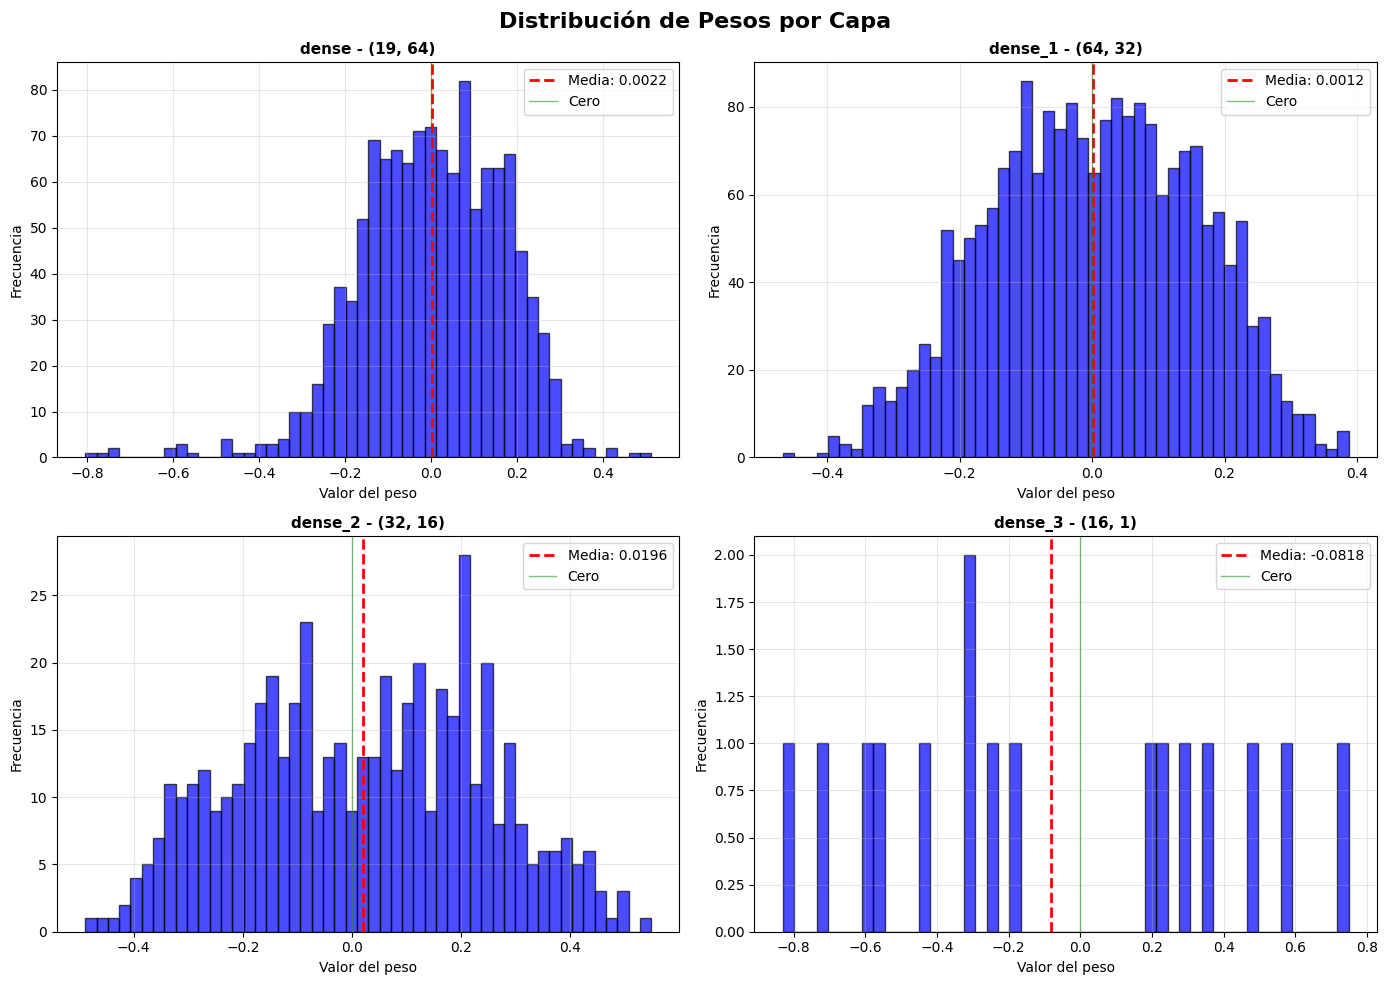

In [ ]:
# Visualización de la distribución de pesos
print("\n=== VISUALIZACIÓN DE DISTRIBUCIÓN DE PESOS ===")
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))
fig2.suptitle('Distribución de Pesos por Capa', fontsize=16, fontweight='bold')

dense_layers = [layer for layer in model.layers if isinstance(layer, Dense)]
for idx, layer in enumerate(dense_layers[:4]):  # Máximo 4 capas Dense
    row = idx // 2
    col = idx % 2
    
    weights = layer.get_weights()[0]  # Matriz de pesos W
    weights_flat = weights.flatten()
    
    axes2[row, col].hist(weights_flat, bins=50, alpha=0.7, color='blue', edgecolor='black')
    axes2[row, col].axvline(weights_flat.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {weights_flat.mean():.4f}')
    axes2[row, col].axvline(0, color='green', linestyle='-', linewidth=1, alpha=0.5, label='Cero')
    axes2[row, col].set_xlabel('Valor del peso', fontsize=10)
    axes2[row, col].set_ylabel('Frecuencia', fontsize=10)
    axes2[row, col].set_title(f'{layer.name} - {weights.shape}', fontsize=11, fontweight='bold')
    axes2[row, col].legend()
    axes2[row, col].grid(True, alpha=0.3)

plt.tight_layout()
print("Gráfica de distribución de pesos guardada como 'mlp_weights_distribution.png'")
plt.show()



=== ARQUITECTURA DE LA RED NEURONAL ===
Gráfica de arquitectura guardada como 'mlp_architecture.png'


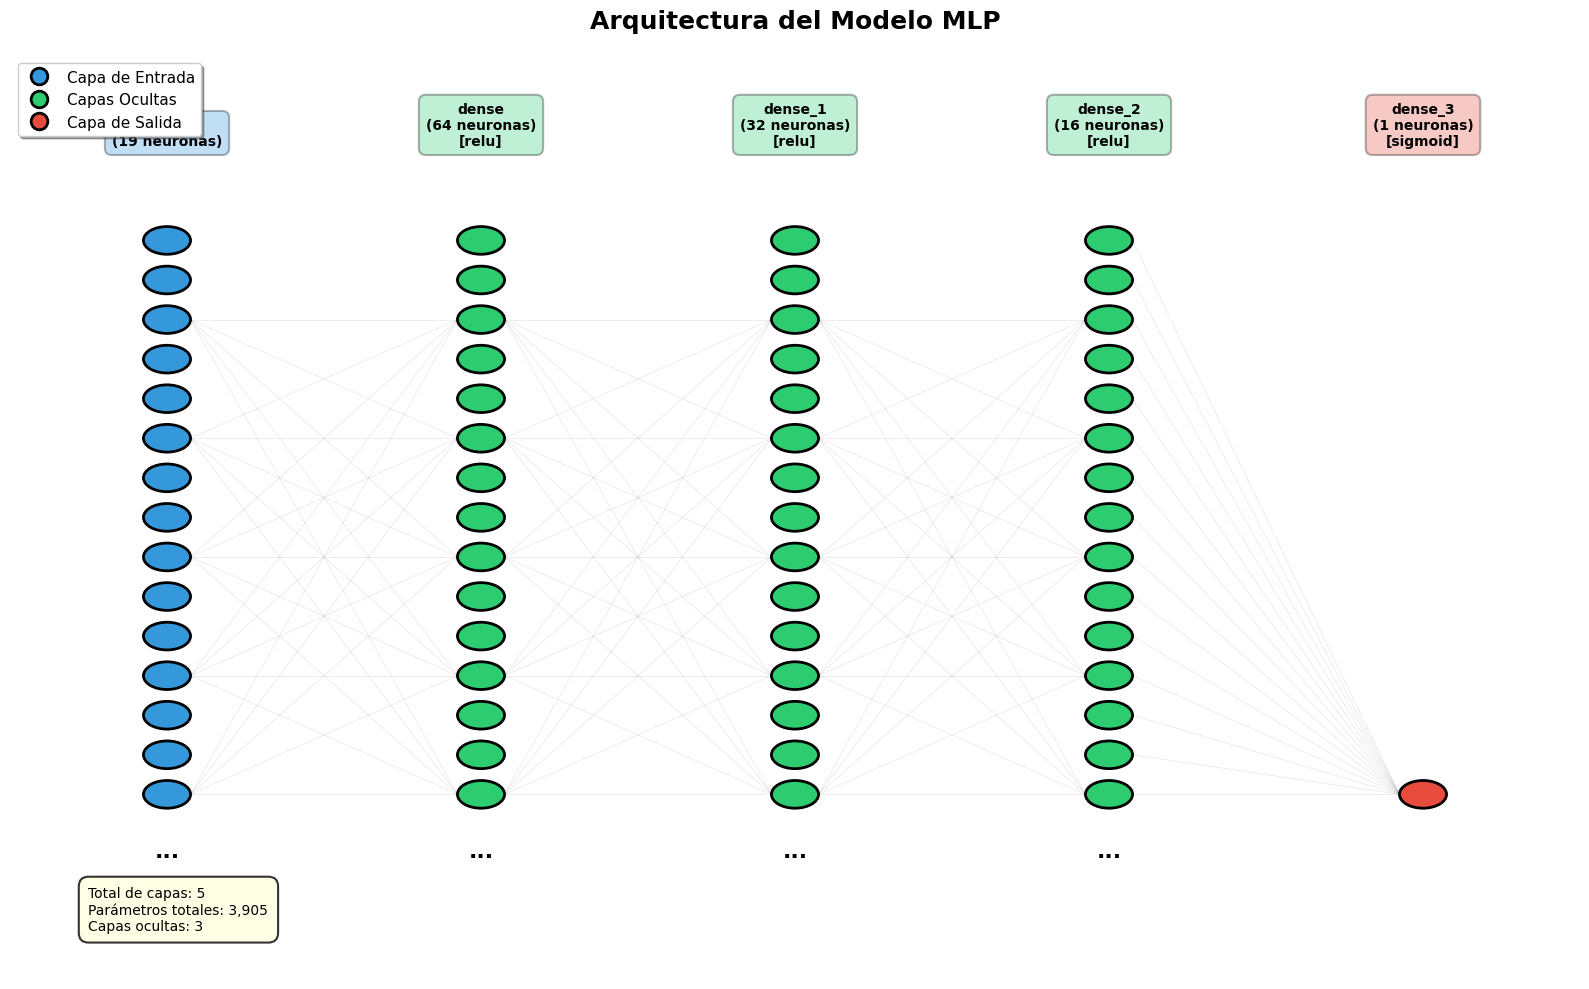

In [69]:
# 9) Visualización de la arquitectura de la red
print("\n=== ARQUITECTURA DE LA RED NEURONAL ===")
fig3, ax3 = plt.subplots(1, 1, figsize=(16, 10))
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10)
ax3.axis('off')
ax3.set_title('Arquitectura del Modelo MLP', fontsize=18, fontweight='bold', pad=20)

# Obtener información de las capas Dense
dense_layer_info = []
for layer in model.layers:
    if isinstance(layer, Dense):
        weights = layer.get_weights()
        if len(weights) > 0:
            input_size = weights[0].shape[0]
            output_size = weights[0].shape[1]
            dense_layer_info.append({
                'name': layer.name,
                'input': input_size,
                'output': output_size,
                'activation': layer.activation.__name__
            })

# Agregar capa de entrada explícita
all_layers = [{'name': 'Input', 'neurons': n_feat, 'type': 'input'}]
for info in dense_layer_info:
    all_layers.append({
        'name': info['name'],
        'neurons': info['output'],
        'type': 'hidden' if info['output'] > 1 else 'output',
        'activation': info['activation']
    })

# Calcular posiciones
num_layers = len(all_layers)
x_positions = np.linspace(1, 9, num_layers)
max_neurons = max([layer['neurons'] for layer in all_layers])

# Colores para cada tipo de capa
colors = {
    'input': '#3498db',      # Azul
    'hidden': '#2ecc71',     # Verde
    'output': '#e74c3c'      # Rojo
}

# Dibujar cada capa
for idx, (layer, x_pos) in enumerate(zip(all_layers, x_positions)):
    num_neurons = layer['neurons']
    layer_type = layer['type']
    
    # Limitar número de neuronas a dibujar para evitar saturación
    neurons_to_draw = min(num_neurons, 15)
    y_positions = np.linspace(2, 8, neurons_to_draw)
    
    # Dibujar neuronas
    for y_pos in y_positions:
        circle = plt.Circle((x_pos, y_pos), 0.15, color=colors[layer_type], 
                           ec='black', linewidth=2, zorder=3)
        ax3.add_patch(circle)
    
    # Si hay más neuronas de las dibujadas, agregar puntos suspensivos
    if num_neurons > neurons_to_draw:
        ax3.text(x_pos, 1.5, '...', fontsize=16, ha='center', va='top', fontweight='bold')
    
    # Etiqueta de la capa
    layer_label = f"{layer['name']}\n({num_neurons} neuronas)"
    if 'activation' in layer:
        layer_label += f"\n[{layer['activation']}]"
    
    ax3.text(x_pos, 9, layer_label, fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', facecolor=colors[layer_type], 
                     alpha=0.3, edgecolor='black', linewidth=1.5),
            fontweight='bold')
    
    # Dibujar conexiones con la capa anterior
    if idx > 0:
        prev_layer = all_layers[idx - 1]
        prev_x = x_positions[idx - 1]
        prev_neurons_to_draw = min(prev_layer['neurons'], 15)
        prev_y_positions = np.linspace(2, 8, prev_neurons_to_draw)
        
        # Dibujar algunas conexiones representativas (no todas para evitar saturación)
        connection_density = max(1, min(3, neurons_to_draw // 5))
        for i, y_prev in enumerate(prev_y_positions[::connection_density]):
            for j, y_curr in enumerate(y_positions[::connection_density]):
                ax3.plot([prev_x + 0.15, x_pos - 0.15], [y_prev, y_curr],
                        'gray', alpha=0.2, linewidth=0.5, zorder=1)

# Agregar leyenda
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['input'],
              markersize=12, label='Capa de Entrada', markeredgecolor='black', markeredgewidth=2),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['hidden'],
              markersize=12, label='Capas Ocultas', markeredgecolor='black', markeredgewidth=2),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['output'],
              markersize=12, label='Capa de Salida', markeredgecolor='black', markeredgewidth=2)
]
ax3.legend(handles=legend_elements, loc='upper left', fontsize=11, frameon=True, 
          fancybox=True, shadow=True)

# Información adicional
info_text = f"Total de capas: {num_layers}\n"
info_text += f"Parámetros totales: {total_params:,}\n"
info_text += f"Capas ocultas: {num_layers - 2}"
ax3.text(0.5, 0.5, info_text, fontsize=10, ha='left', va='bottom',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='lightyellow', 
                 alpha=0.8, edgecolor='black', linewidth=1.5))

plt.tight_layout()
print("Gráfica de arquitectura guardada como 'mlp_architecture.png'")
plt.show()

In [70]:
# Resumen en texto de la arquitectura
print("\n=== RESUMEN DE ARQUITECTURA ===")
for idx, layer in enumerate(all_layers):
    if idx == 0:
        print(f"{'='*60}")
        print(f"CAPA DE ENTRADA")
        print(f"  └─ Neuronas: {layer['neurons']} (features del dataset)")
    elif idx == len(all_layers) - 1:
        print(f"{'='*60}")
        print(f"CAPA DE SALIDA")
        print(f"  └─ Neuronas: {layer['neurons']}")
        print(f"  └─ Activación: {layer['activation']}")
        print(f"  └─ Tipo: Clasificación binaria")
    else:
        print(f"{'='*60}")
        print(f"CAPA OCULTA #{idx}")
        print(f"  └─ Nombre: {layer['name']}")
        print(f"  └─ Neuronas: {layer['neurons']}")
        print(f"  └─ Activación: {layer['activation']}")
print(f"{'='*60}")


=== RESUMEN DE ARQUITECTURA ===
CAPA DE ENTRADA
  └─ Neuronas: 19 (features del dataset)
CAPA OCULTA #1
  └─ Nombre: dense
  └─ Neuronas: 64
  └─ Activación: relu
CAPA OCULTA #2
  └─ Nombre: dense_1
  └─ Neuronas: 32
  └─ Activación: relu
CAPA OCULTA #3
  └─ Nombre: dense_2
  └─ Neuronas: 16
  └─ Activación: relu
CAPA DE SALIDA
  └─ Neuronas: 1
  └─ Activación: sigmoid
  └─ Tipo: Clasificación binaria


In [71]:
# 10) Guardar el modelo entrenado
print("\n=== GUARDANDO MODELO ENTRENADO ===")

# Guardar modelo completo en formato Keras (.keras)
model_path_keras = 'mlp_model.keras'
model.save(model_path_keras)
print(f"✓ Modelo guardado en formato Keras: {model_path_keras}")

# Guardar solo los pesos del modelo
weights_path = 'mlp_weights.weights.h5'
model.save_weights(weights_path)
print(f"✓ Pesos del modelo guardados: {weights_path}")

# Guardar el escalador para uso futuro
import pickle
scaler_path = 'scaler.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(sc, f)
print(f"✓ Escalador guardado: {scaler_path}")



=== GUARDANDO MODELO ENTRENADO ===
✓ Modelo guardado en formato Keras: mlp_model.keras
✓ Pesos del modelo guardados: mlp_weights.weights.h5
✓ Escalador guardado: scaler.pkl


In [72]:
# Guardar información del modelo en un archivo de texto
model_info_path = 'model_info.txt'
with open(model_info_path, 'w', encoding='utf-8') as f:
    f.write("="*70 + "\n")
    f.write("INFORMACIÓN DEL MODELO MLP - ENTREGA A TIEMPO\n")
    f.write("="*70 + "\n\n")
    
    f.write("CONFIGURACIÓN DEL MODELO:\n")
    f.write("-" * 70 + "\n")
    f.write(f"Número de características de entrada: {n_feat}\n")
    f.write(f"Total de capas: {len(model.layers)}\n")
    f.write(f"Total de parámetros: {total_params:,}\n")
    f.write(f"Parámetros entrenables: {trainable_params:,}\n")
    f.write(f"Optimizador: Adam\n")
    f.write(f"Función de pérdida: Binary Crossentropy\n")
    f.write(f"Épocas entrenadas: {len(history.history['loss'])}\n")
    f.write(f"Batch size: 64\n\n")
    
    f.write("ARQUITECTURA:\n")
    f.write("-" * 70 + "\n")
    for idx, layer in enumerate(all_layers):
        if idx == 0:
            f.write(f"Capa de Entrada: {layer['neurons']} neuronas\n")
        elif idx == len(all_layers) - 1:
            f.write(f"Capa de Salida: {layer['neurons']} neurona(s) - Activación: {layer['activation']}\n")
        else:
            f.write(f"Capa Oculta #{idx}: {layer['neurons']} neuronas - Activación: {layer['activation']}\n")
    
    f.write("\n" + "MÉTRICAS FINALES:\n")
    f.write("-" * 70 + "\n")
    f.write(f"Train Loss: {history.history['loss'][-1]:.4f}\n")
    f.write(f"Val Loss: {history.history['val_loss'][-1]:.4f}\n")
    for metric in train_metrics:
        val_metric = val_metrics_map.get(metric, f'val_{metric}')
        f.write(f"Train {metric.upper()}: {history.history[metric][-1]:.4f}\n")
        if val_metric in history.history:
            f.write(f"Val {metric.upper()}: {history.history[val_metric][-1]:.4f}\n")
    
    f.write(f"\nVal ROC-AUC: {roc_auc_score(y_va, p_va):.4f}\n")
    f.write(f"Val PR-AUC: {average_precision_score(y_va, p_va):.4f}\n")
    f.write(f"Best threshold: {best_th:.4f}\n")
    f.write(f"Best F1 Score: {best_f1:.4f}\n")
    
    f.write("\n" + "REPORTE DE CLASIFICACIÓN (TEST SET):\n")
    f.write("-" * 70 + "\n")
    f.write(classification_report(y_te, yhat_te, digits=3))
    
    f.write("\n" + "="*70 + "\n")
    f.write("ARCHIVOS GENERADOS:\n")
    f.write("-" * 70 + "\n")
    f.write(f"1. {model_path_keras} - Modelo completo en formato Keras\n")
    f.write(f"2. {weights_path} - Solo pesos del modelo\n")
    f.write(f"3. {scaler_path} - Escalador StandardScaler\n")
    f.write(f"4. mlp_training_history.png - Gráficas de entrenamiento\n")
    f.write(f"5. mlp_weights_distribution.png - Distribución de pesos\n")
    f.write(f"6. mlp_architecture.png - Arquitectura del modelo\n")
    f.write(f"7. {model_info_path} - Este archivo de información\n")
    
    f.write("\n" + "="*70 + "\n")
    f.write("CÓMO USAR EL MODELO GUARDADO:\n")
    f.write("-" * 70 + "\n")
    f.write("import pickle\n")
    f.write("from tensorflow.keras.models import load_model\n\n")
    f.write(f"# Cargar el modelo\n")
    f.write(f"model = load_model('{model_path_keras}')\n\n")
    f.write(f"# Cargar el escalador\n")
    f.write(f"with open('{scaler_path}', 'rb') as f:\n")
    f.write(f"    scaler = pickle.load(f)\n\n")
    f.write(f"# Hacer predicciones\n")
    f.write(f"# X_new = ... # tus nuevos datos\n")
    f.write(f"# X_new_scaled = scaler.transform(X_new)\n")
    f.write(f"# predictions = model.predict(X_new_scaled)\n")
    f.write(f"# binary_predictions = (predictions >= {best_th:.4f}).astype(int)\n")
    f.write("="*70 + "\n")

print(f"✓ Información del modelo guardada: {model_info_path}")


✓ Información del modelo guardada: model_info.txt
